In [107]:
#downloading MINST dataset
import torch
import torchvision.transforms as transforms
from torchvision import datasets
 
# loading training data
train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)
#loading test data
test_dataset = datasets.MNIST(root='./data', 
                              train=False, 
                              transform=transforms.ToTensor())

100%|██████████| 9.91M/9.91M [00:04<00:00, 2.07MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 219kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.51MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.62MB/s]


In [108]:
print(f"Number of trainingsamples {len(train_dataset)} \n number of test samples {len(test_dataset)}")

Number of trainingsamples 60000 
 number of test samples 10000


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

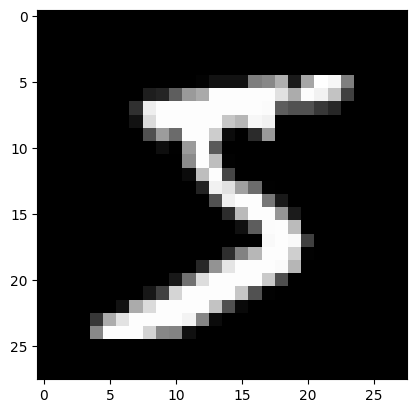

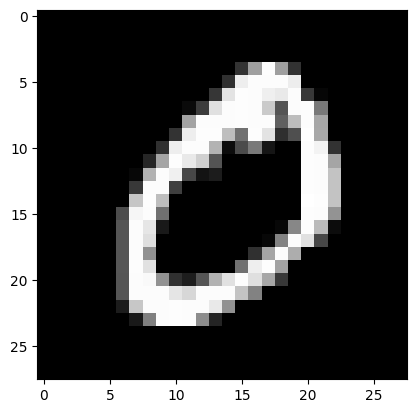

In [109]:
import matplotlib.pyplot as plt
img_5 = train_dataset[0][0].numpy().reshape(28, 28)
print(img_5)
plt.imshow(img_5, cmap='gray')
plt.show()
img_0 = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(img_0, cmap='gray')
plt.show()

In [110]:
from torch.utils.data import DataLoader
batach_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batach_size, shuffle=True) 
test_loader = DataLoader(dataset=test_dataset, batch_size=batach_size, shuffle=False)

In [111]:
class LogisticRegression(torch.nn.Module):    
    # build the constructor
    def __init__(self, n_inputs, n_outputs):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)
    # make predictions
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [112]:
n_inputs = 28*28 # makes a 1D vector of 784
n_outputs = 10
log_regr = LogisticRegression(n_inputs, n_outputs)

In [113]:
optimizer = torch.optim.SGD(log_regr.parameters(), lr=0.001)
# defining Cross-Entropy loss
criterion = torch.nn.CrossEntropyLoss()
 
epochs = 10
Loss = []
acc = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = log_regr(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        # Loss.append(loss.item())
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    for images, labels in test_loader:
        outputs = log_regr(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

Epoch: 0. Loss: 2.200294017791748. Accuracy: 61.23
Epoch: 1. Loss: 2.107355833053589. Accuracy: 74.67
Epoch: 2. Loss: 2.0644166469573975. Accuracy: 78.12
Epoch: 3. Loss: 1.9850051403045654. Accuracy: 79.69
Epoch: 4. Loss: 1.956963062286377. Accuracy: 80.61
Epoch: 5. Loss: 1.9317432641983032. Accuracy: 81.15
Epoch: 6. Loss: 1.9346364736557007. Accuracy: 81.53
Epoch: 7. Loss: 1.925182819366455. Accuracy: 82.02
Epoch: 8. Loss: 1.8858591318130493. Accuracy: 82.41
Epoch: 9. Loss: 1.8655260801315308. Accuracy: 82.75


In [130]:
#Linear regression implementation
import torch.nn as nn

lin_reg_model = nn.Sequential(
    nn.Linear(28*28,10),
    nn.Sigmoid()
)
print(lin_reg_model)

Sequential(
  (0): Linear(in_features=784, out_features=10, bias=True)
  (1): Sigmoid()
)


In [144]:
optimizer = torch.optim.Adam(lin_reg_model.parameters(), lr=0.001)
# defining Cross-Entropy loss
criterion = torch.nn.CrossEntropyLoss()
 
epochs = 10
Loss = []
acc = []
predicted_array = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = lin_reg_model(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    predictions = []
    for images, labels in test_loader:
        outputs = lin_reg_model(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        predictions.append(predicted.numpy())
        correct += (predicted == labels).sum()
    predicted_array.append(np.concatenate(predictions, axis=0))
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

Epoch: 0. Loss: 1.5257326364517212. Accuracy: 91.82
Epoch: 1. Loss: 1.497344732284546. Accuracy: 91.95
Epoch: 2. Loss: 1.5227904319763184. Accuracy: 91.9
Epoch: 3. Loss: 1.5617561340332031. Accuracy: 91.81
Epoch: 4. Loss: 1.5438607931137085. Accuracy: 91.87
Epoch: 5. Loss: 1.5389705896377563. Accuracy: 91.93
Epoch: 6. Loss: 1.5270705223083496. Accuracy: 91.83
Epoch: 7. Loss: 1.503662109375. Accuracy: 91.87
Epoch: 8. Loss: 1.534816861152649. Accuracy: 92.0
Epoch: 9. Loss: 1.4911930561065674. Accuracy: 91.88


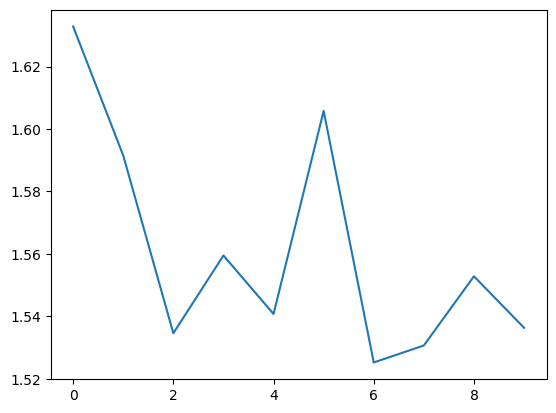

In [116]:
plt.plot(range(len(Loss)), Loss)
#plt.plot(range(len(acc)), acc)

In [117]:
from sklearn import datasets # Import train_test_split function
from sklearn.model_selection import train_test_split  #Import scikit-learn dataset library
from sklearn import svm #Import svm model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np

In [118]:
images_train, labels_train = zip(*train_dataset)
images_train = np.array(images_train)
labels_train = np.array(labels_train)

In [119]:
clf = svm.SVC(kernel="linear")
images_train = images_train.reshape(images_train.shape[0], -1)


In [120]:
images_train.shape

(60000, 784)

In [121]:
clf.fit(images_train, labels_train)

SVC(kernel='linear')

In [122]:
images_test, labels_test = zip(*test_dataset)
images_test = np.array(images_test)
labels_test = np.array(labels_test)
images_test = images_test.reshape(images_test.shape[0], -1)
svm_pred = clf.predict(images_test)

In [123]:
print(metrics.accuracy_score(labels_test, svm_pred))

0.9404


In [124]:
from sklearn.ensemble import RandomForestClassifier 

In [125]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(images_train, labels_train)

RandomForestClassifier()

In [126]:
rf_pred = rf.predict(images_test)
metrics.accuracy_score(rf_pred, labels_test)

0.9699

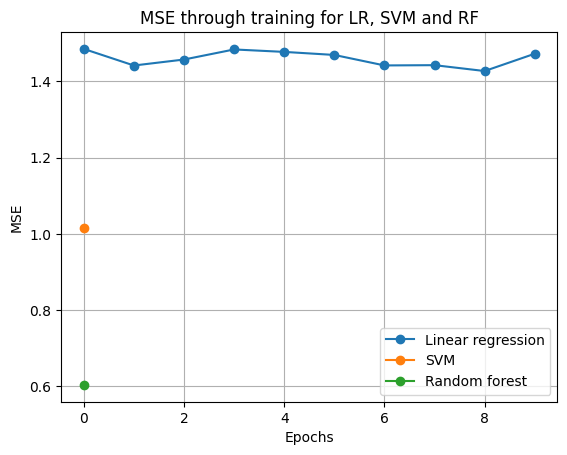

In [164]:
rf_mse = np.array([metrics.mean_squared_error(labels_test, rf_pred)])
svm_mse = np.array([metrics.mean_squared_error(labels_test, svm_pred)])
lr_mse = [metrics.mean_squared_error(labels_test, pred) for pred in predicted_array]
plt.plot(range(len(lr_mse)), lr_mse, marker='o')
plt.plot([0], svm_mse, marker='o')
plt.plot([0], rf_mse, marker='o')
plt.grid()
plt.title("MSE through training for LR, SVM and RF")
plt.legend(["Linear regression", "SVM", "Random forest"])
plt.ylabel("MSE")
plt.xlabel("Epochs")
plt.show()


In [22]:
##A.3.2
import pandas as pd                                                                            

In [33]:
weather_df = pd.read_csv("seattle-weather.csv")
print(weather_df.filter(["date", "percipitation", "temp_max","temp_min","wind"]))

            date  temp_max  temp_min  wind
0     2012-01-01      12.8       5.0   4.7
1     2012-01-02      10.6       2.8   4.5
2     2012-01-03      11.7       7.2   2.3
3     2012-01-04      12.2       5.6   4.7
4     2012-01-05       8.9       2.8   6.1
...          ...       ...       ...   ...
1456  2015-12-27       4.4       1.7   2.9
1457  2015-12-28       5.0       1.7   1.3
1458  2015-12-29       7.2       0.6   2.6
1459  2015-12-30       5.6      -1.0   3.4
1460  2015-12-31       5.6      -2.1   3.5

[1461 rows x 4 columns]


In [93]:
weather_input, weather_label = weather_df.filter(["precipitation","temp_max","temp_min","wind"]).to_numpy(), weather_df["weather"].map({"drizzle":0, "rain":1, "sun":2, "snow":3, "fog":4}).to_numpy()
print(weather_input)
weather_input = torch.tensor(weather_input, dtype=torch.float32)
weather_label = torch.tensor(weather_label,)
print(weather_label)
weather_input_train, weather_input_test, weather_label_train,weather_label_test = train_test_split(weather_input, weather_label, train_size=0.7)
batach_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batach_size, shuffle=True) 
test_loader = DataLoader(dataset=test_dataset, batch_size=batach_size, shuffle=False)

[[ 0.  12.8  5.   4.7]
 [10.9 10.6  2.8  4.5]
 [ 0.8 11.7  7.2  2.3]
 ...
 [ 0.   7.2  0.6  2.6]
 [ 0.   5.6 -1.   3.4]
 [ 0.   5.6 -2.1  3.5]]
tensor([0, 1, 1,  ..., 4, 2, 2])


In [94]:
weather_model = nn.Sequential(
    nn.Linear(4,5),
    nn.Softmax()
)


In [95]:
optimizer = torch.optim.Adam(weather_model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()
 
epochs = 50
Loss = []
acc = []
for epoch in range(epochs):
    for i in range(0, len(weather_input_train), batach_size):
        x_batch = weather_input_train[i:i+batach_size]
        y_batch = weather_label_train[i:i+batach_size]
        optimizer.zero_grad()
        outputs = weather_model(x_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    for i in range(0, len(weather_input_test), batach_size):
        x_batch = weather_input_test[i:i+batach_size]
        y_batch = weather_label_test[i:i+batach_size]
        outputs = weather_model(x_batch)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == y_batch).sum()
    accuracy = 100 * (correct.item()) / len(weather_input_test)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

/home/img/Code/Python/AICourse/AILabs/lib/python3.13/site-packages/torch/nn/modules/module.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch: 0. Loss: 1.817827820777893. Accuracy: 16.173120728929383
Epoch: 1. Loss: 1.7915441989898682. Accuracy: 17.767653758542142
Epoch: 2. Loss: 1.7404943704605103. Accuracy: 19.134396355353076
Epoch: 3. Loss: 1.6307305097579956. Accuracy: 21.184510250569478
Epoch: 4. Loss: 1.3163599967956543. Accuracy: 58.99772209567198
Epoch: 5. Loss: 1.2417864799499512. Accuracy: 61.04783599088838
Epoch: 6. Loss: 1.1930280923843384. Accuracy: 65.37585421412301
Epoch: 7. Loss: 1.1513304710388184. Accuracy: 69.24829157175398
Epoch: 8. Loss: 1.1207228899002075. Accuracy: 73.34851936218679
Epoch: 9. Loss: 1.109465479850769. Accuracy: 73.57630979498862
Epoch: 10. Loss: 1.1026865243911743. Accuracy: 74.03189066059225
Epoch: 11. Loss: 1.0975725650787354. Accuracy: 74.71526195899773
Epoch: 12. Loss: 1.0934966802597046. Accuracy: 75.39863325740319
Epoch: 13. Loss: 1.090091586112976. Accuracy: 75.39863325740319
Epoch: 14. Loss: 1.087188959121704. Accuracy: 75.62642369020502
Epoch: 15. Loss: 1.0846836566925049

In [96]:
weather_clf = svm.SVC(kernel="linear")

SVC(kernel='linear')

In [97]:
weather_clf.fit(weather_input_train, weather_label_train)

SVC(kernel='linear')

In [100]:
weather_svm_pred = weather_clf.predict(weather_input_test)
metrics.accuracy_score(weather_svm_pred, weather_label_test)

0.8496583143507973

In [101]:
weather_rf = RandomForestClassifier(n_estimators=100, max_depth=8)
weather_rf.fit(weather_input_train, weather_label_train)


RandomForestClassifier(max_depth=8)

In [102]:
weather_rf_pred = weather_rf.predict(weather_input_test)
metrics.accuracy_score(weather_rf_pred, weather_label_test)

0.8519362186788155

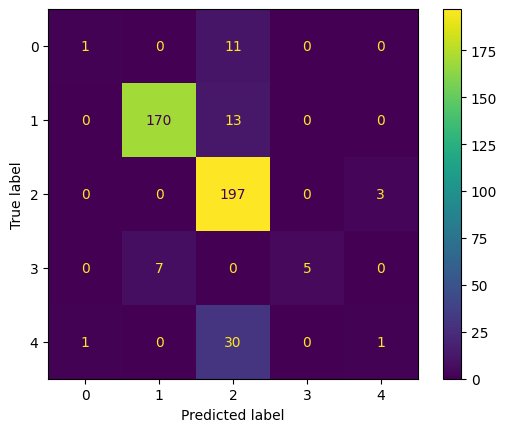

In [106]:
array = metrics.confusion_matrix(weather_label_test, weather_rf_pred)
metrics.ConfusionMatrixDisplay(array).plot()
